In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('capital_bike_data/train.csv')

## STEP 1. Read through dataset & Feature Engineer

- get a first impression & check out data
- find corrolations (heatmap & plotting)

In [62]:
# shows all NaN cells / there are none in here
#df[df['holiday'].isnull()]
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [63]:
df.sum()

datetime      2011-01-01 00:00:002011-01-01 01:00:002011-01-...
season                                                    27287
holiday                                                     311
workingday                                                 7412
weather                                                   15441
temp                                                     220233
atemp                                                    257509
humidity                                                 673696
windspeed                                                139334
casual                                                   392135
registered                                              1693341
count                                                   2085476
dtype: object

In [64]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [65]:
# shows all holidays / there are 311 in this data set
df[[row>0 for row in df['holiday']]]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
372,2011-01-17 00:00:00,1,1,0,2,8.20,9.850,47,15.0013,1,16,17
373,2011-01-17 01:00:00,1,1,0,2,8.20,9.850,44,12.9980,1,15,16
374,2011-01-17 02:00:00,1,1,0,2,7.38,8.335,43,16.9979,0,8,8
375,2011-01-17 03:00:00,1,1,0,2,7.38,9.090,43,12.9980,0,2,2
376,2011-01-17 04:00:00,1,1,0,2,7.38,9.850,43,8.9981,1,2,3
377,2011-01-17 05:00:00,1,1,0,2,7.38,9.850,43,11.0014,0,1,1
378,2011-01-17 06:00:00,1,1,0,2,7.38,9.090,43,12.9980,0,5,5
379,2011-01-17 07:00:00,1,1,0,2,6.56,9.090,50,8.9981,4,9,13
380,2011-01-17 08:00:00,1,1,0,2,6.56,7.575,47,15.0013,3,30,33
381,2011-01-17 09:00:00,1,1,0,2,6.56,7.575,47,15.0013,8,39,47


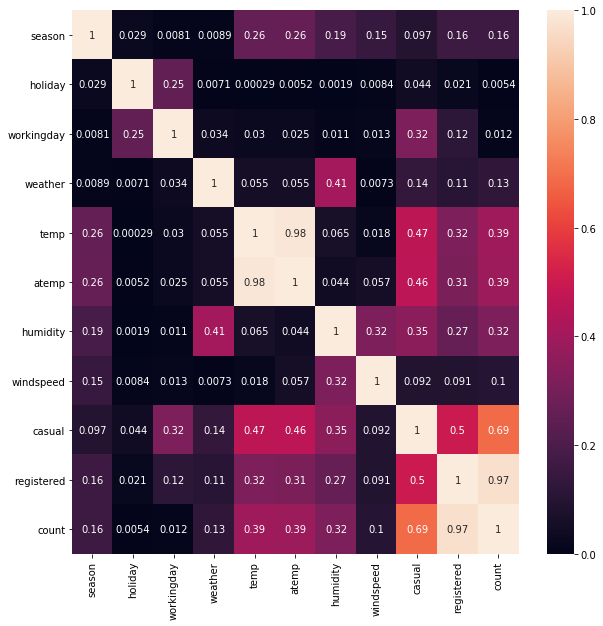

In [66]:
plt.subplots(figsize = (10,10))
#  important to import matplotlib.pyplot as pl not just matplotlib (i.e. for fisize)
# use absolut value 
sns.heatmap(df.corr().abs(), annot=True)
# heatmap will not show strings!!! Dates & Time are stings in this df !!!

In [67]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [68]:
df['date'] = pd.to_datetime(df['datetime'])
# change datetime from string into datetime datatype
# set it as index for better search (by month, by season, etc.)
# because sorting in column (as line below) does not adresse the date-object and throughs an ERROR
# df['date'][2].year

In [69]:
df.set_index(['date'], inplace=True)

TASKS: 
    - separate Year, Monat, Day and Time 
    - apply ling Regression and Random Forest 

In [70]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour

In [71]:
# df = df[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]
# alternative with drop()
df = df.drop(['datetime'], axis=1)
df.reset_index(inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
date,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


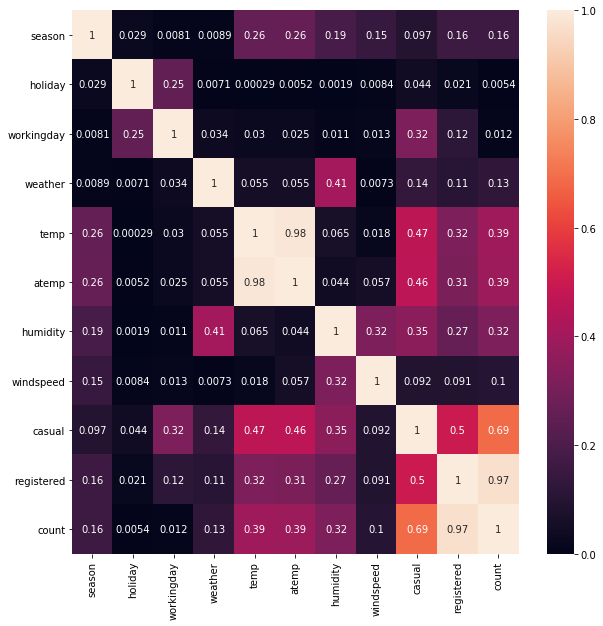

In [12]:
plt.subplots(figsize = (10,10))
sns.heatmap(df.corr().abs(), annot=True)

In [13]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
date,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


create your own features by binning data


In [14]:
# TASK: select rows that contain date of 2011 in new dataframe
df_2011 = df[df.index.year == 2011]
# !!!!!!!!!  SAME RESULT:
# !!!!!!!!!  df[df['holiday']==1]
# !!!!!!!!!  df[df.holiday == 1]

In [15]:
df_2011.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
date,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [16]:
# QUESTINO: do people cycle less corrolated to waether

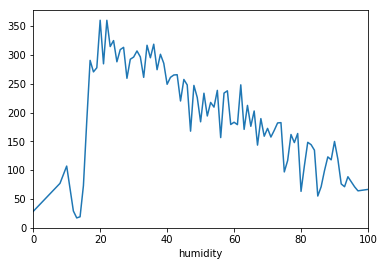

In [17]:
df.groupby(['humidity'])['count'].mean().plot()

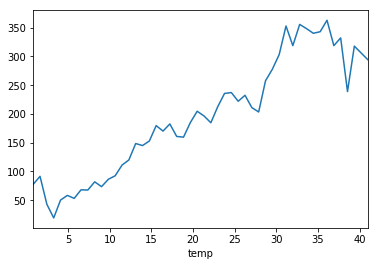

In [18]:
df.groupby(['temp'])['count'].mean().plot()

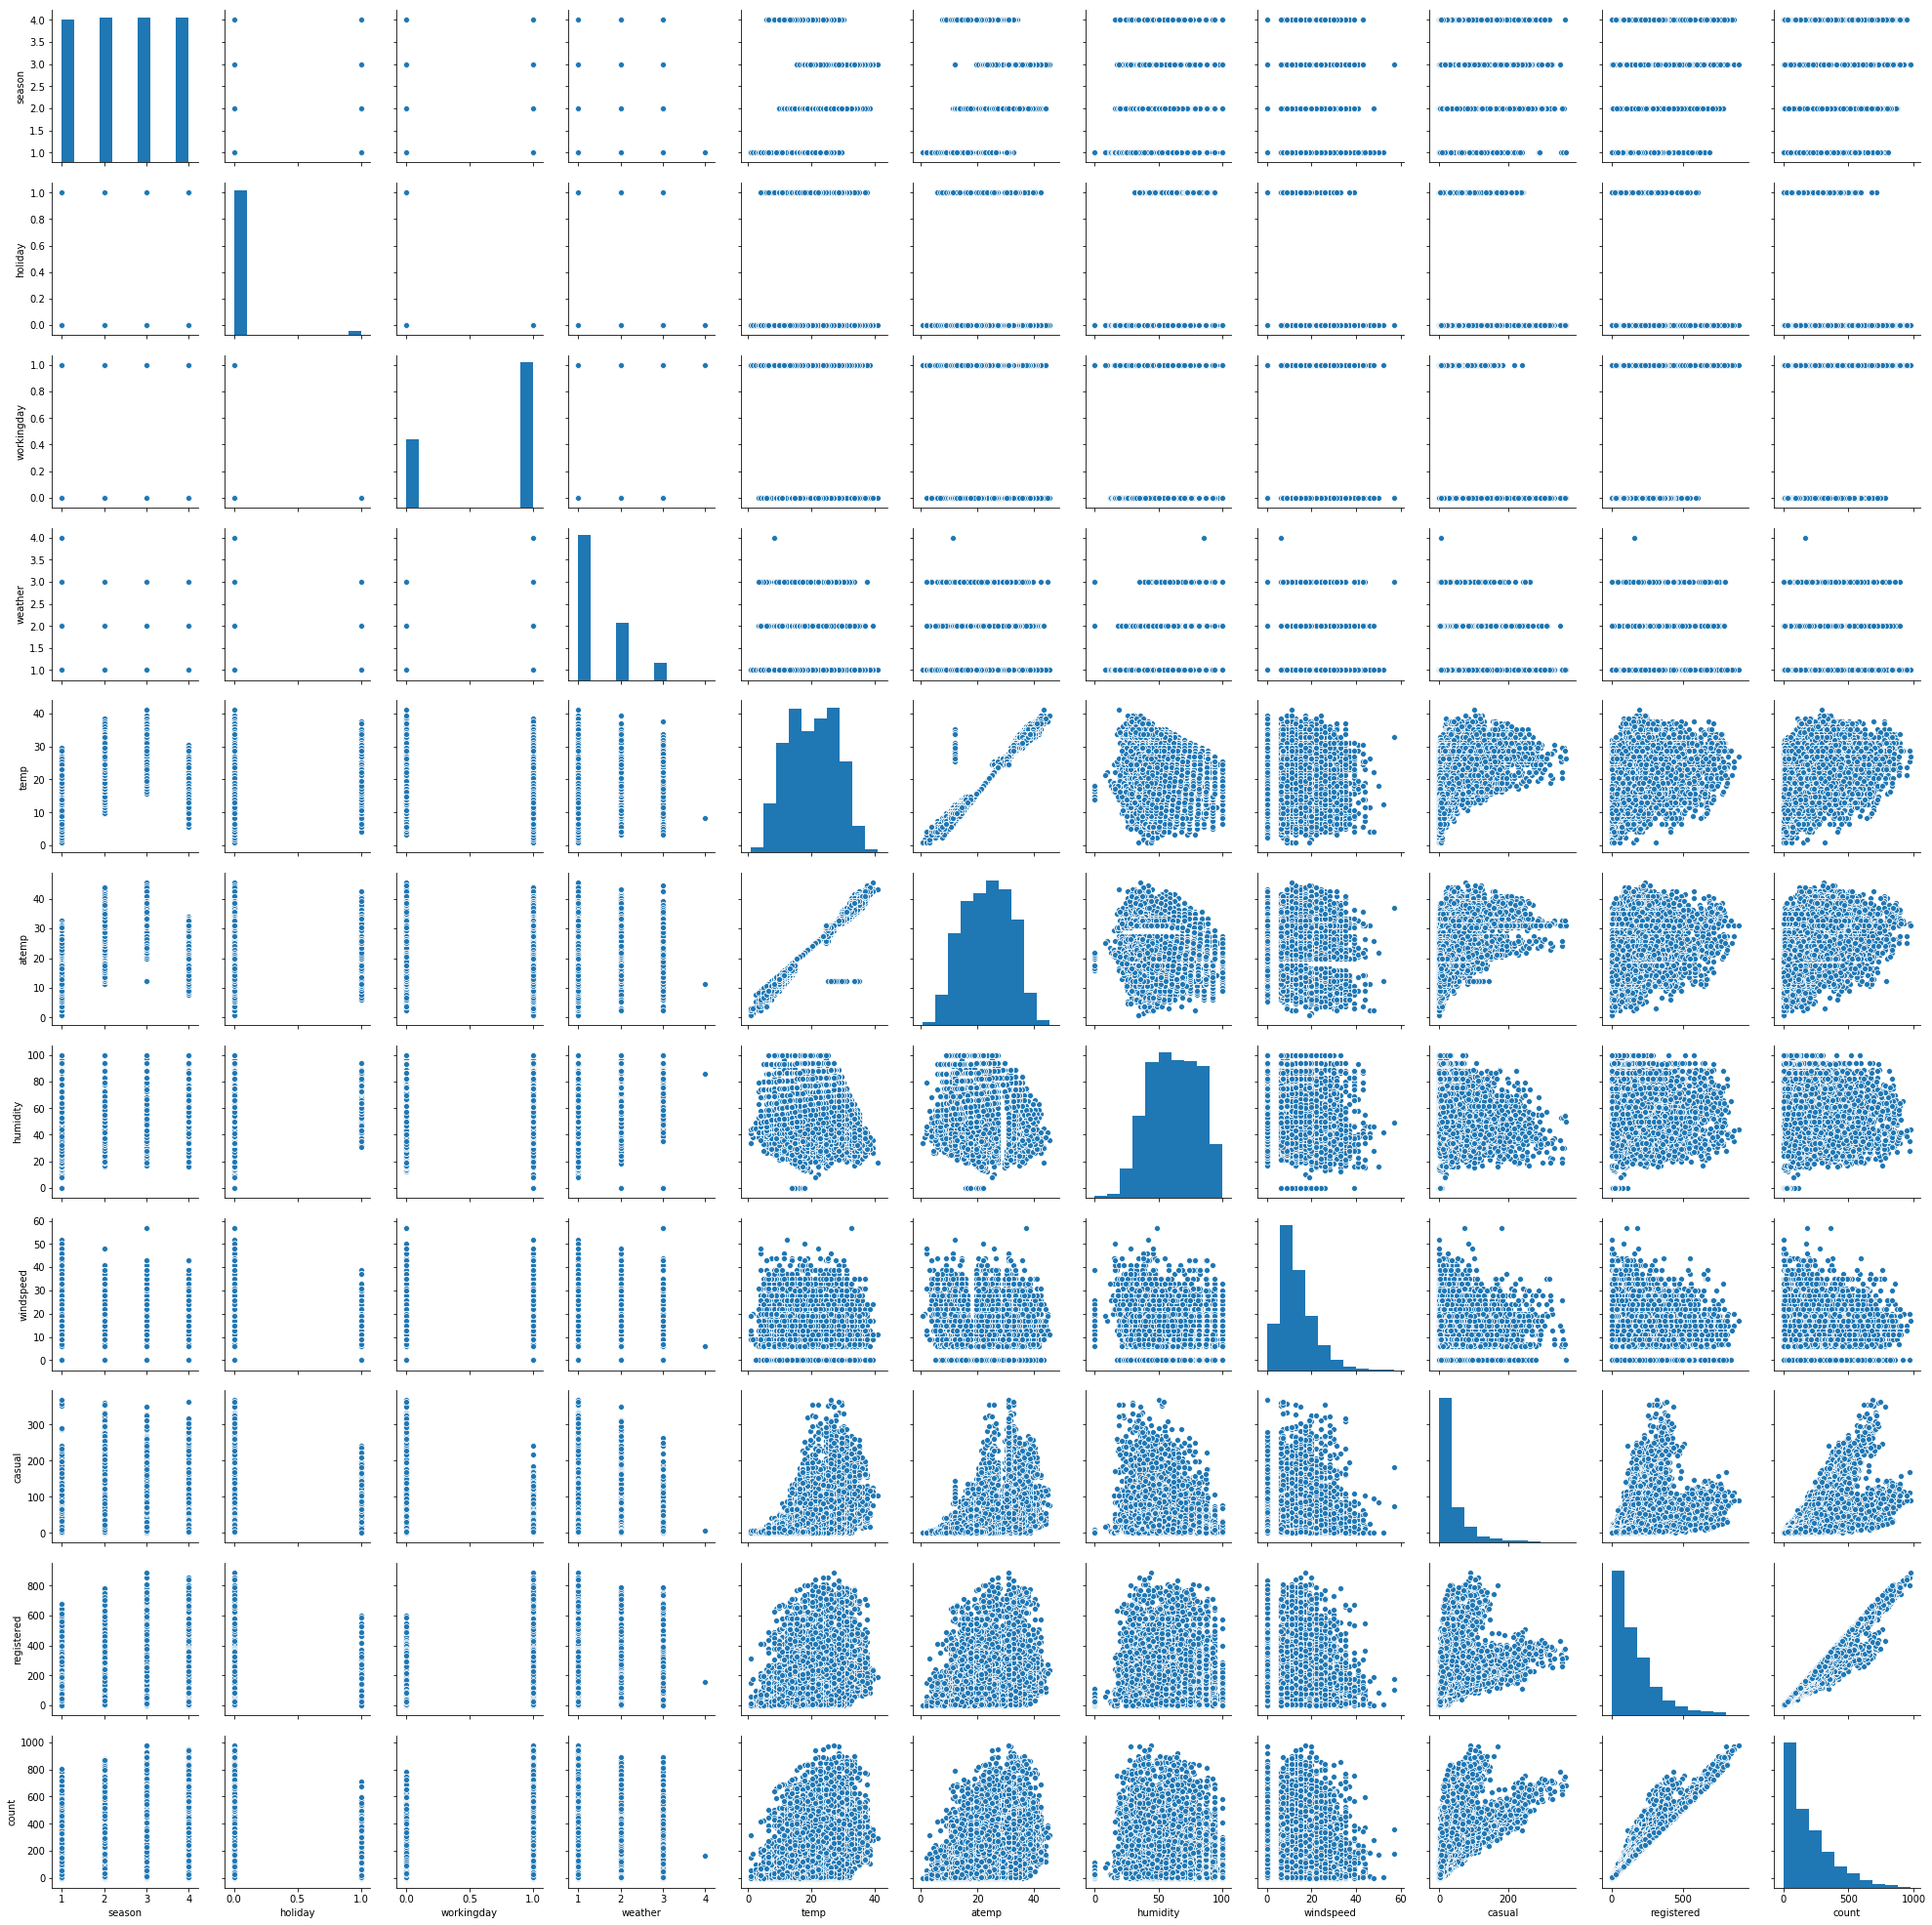

In [19]:
sns.pairplot(df)